In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [4]:
#Loading and reading the dataset
df = pd.read_csv("C:/Users/lawal/OneDrive/Desktop/THIRD SEMESTER/ADMIN 5016/healthcare-dataset-stroke-data.csv")

PREPROCESSING 

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# Examine the dataset structure
print(df.head())  
print(df.shape)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
(5110, 12)


In [8]:
# Check the data types of each column
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [9]:
#returns the number of all missing values in the data set.
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
#filling the NaN values in df['bmi'] column with the mean value of df['bmi']
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [11]:
#check if the missing values have been replced
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
#if the patient had a stroke 1 or 0 if not
#count of 0's and 1's
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


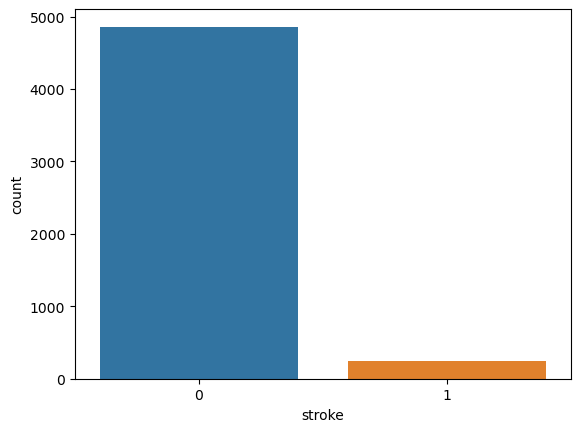

In [13]:
# Identify the target variable and its distribution
target_variable = 'stroke'  
sns.countplot(df[target_variable])
plt.show()

In [14]:
#check some statistical information of all the numerical features.
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


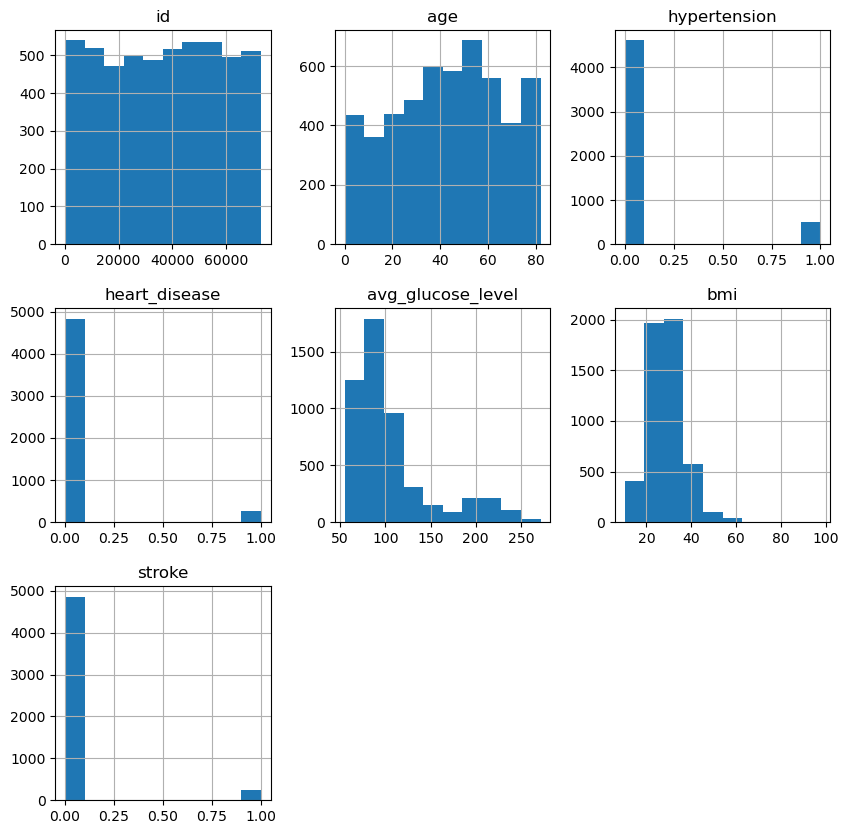

In [15]:
# Explore the distribution of each feature
df.hist(figsize=(10, 10))
plt.show()

C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


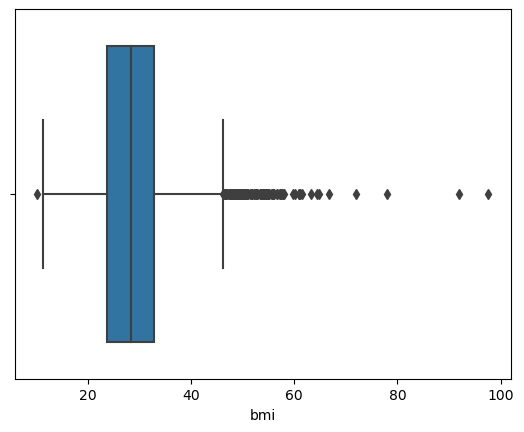

In [16]:
#We used boxplot to display the distribution of the dataset to check outliers and their values
sns.boxplot(df['bmi'])
plt.show()

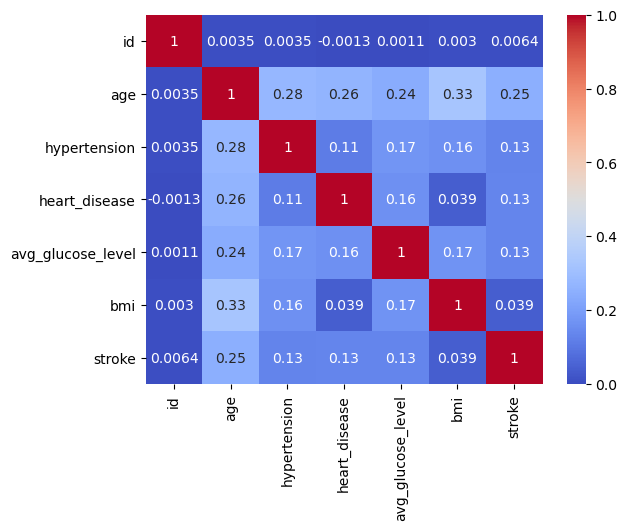

In [17]:
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Feature Engineering for the Gender, marital status, work type, residencial type and smoking status columns

In [18]:
# One-hot encoding for Gender column
gender_encoder = OneHotEncoder(sparse=False, drop='first')
gender_encoded = pd.DataFrame(gender_encoder.fit_transform(df[['gender']]), 
                columns=['Gender_' + category for category in gender_encoder.categories_[0][1:]])

In [19]:
# One-hot encoding for Marital Status column
marital_status_encoder = OneHotEncoder(sparse=False, drop='first')
marital_status_encoded = pd.DataFrame(marital_status_encoder.fit_transform(df[['ever_married']]), 
                        columns=['MaritalStatus_' + category for category in marital_status_encoder.categories_[0][1:]])

In [20]:
# One-hot encoding for Work Type Distribution column
work_type_encoder = OneHotEncoder(sparse=False, drop='first')
work_type_encoded = pd.DataFrame(work_type_encoder.fit_transform(df[['work_type']]), 
                    columns=['WorkType_' + category for category in work_type_encoder.categories_[0][1:]])

In [21]:
# One-hot encoding for Residential Type column
residence_type_encoder = OneHotEncoder(sparse=False, drop='first')
residence_type_encoded = pd.DataFrame(residence_type_encoder.fit_transform(df[['Residence_type']]),
                        columns=['ResidenceType_' + category for category in residence_type_encoder.categories_[0][1:]])

In [22]:
# One-hot encoding for Smoking Status column
smoking_status_encoder = OneHotEncoder(sparse=False, drop='first')
smoking_status_encoded = pd.DataFrame(smoking_status_encoder.fit_transform(df[['smoking_status']]),
                        columns=['SmokingStatus_' + category for category in smoking_status_encoder.categories_[0][1:]])


In [23]:
# Concatenate the encoded features with the original dataset
encoded_data = pd.concat([df, gender_encoded, marital_status_encoded, work_type_encoded, 
                residence_type_encoded, smoking_status_encoded], axis=1)

In [24]:
encoded_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Gender_Other,MaritalStatus_Yes,WorkType_Never_worked,WorkType_Private,WorkType_Self-employed,WorkType_children,ResidenceType_Urban,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
#The unique element present in all the categorical features
col=df[['gender','ever_married','work_type','Residence_type','smoking_status']]
for i in col:
    print(f'{i}: unique elements | {col[i].unique()}')

gender: unique elements | ['Male' 'Female' 'Other']
ever_married: unique elements | ['Yes' 'No']
work_type: unique elements | ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: unique elements | ['Urban' 'Rural']
smoking_status: unique elements | ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


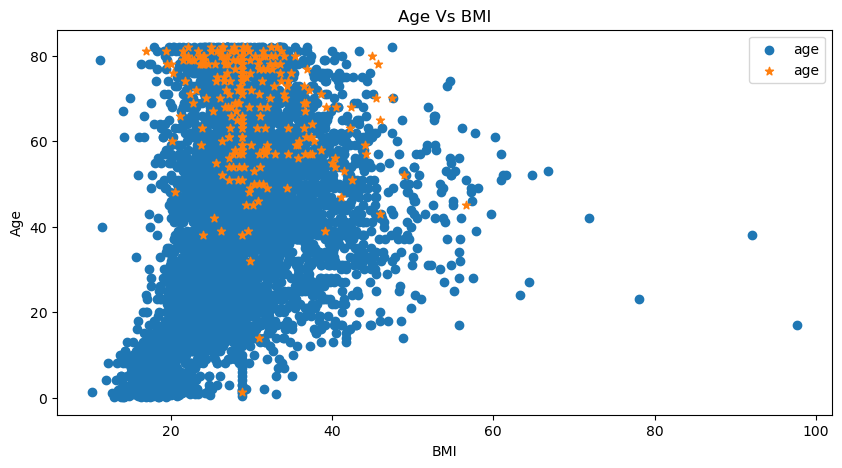

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x='bmi',y='age', data=df[df['stroke']==0])
plt.scatter(x='bmi',y='age', data=df[df['stroke']==1], marker='*')

plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Age Vs BMI')
plt.legend()
plt.show()

Based on the plot, it can be observed that patients above the age of 40 tend to have a higher possibility of experiencing a stroke. Additionally, patients with a BMI ranging from 20 to 50 also show a higher likelihood of having a stroke.

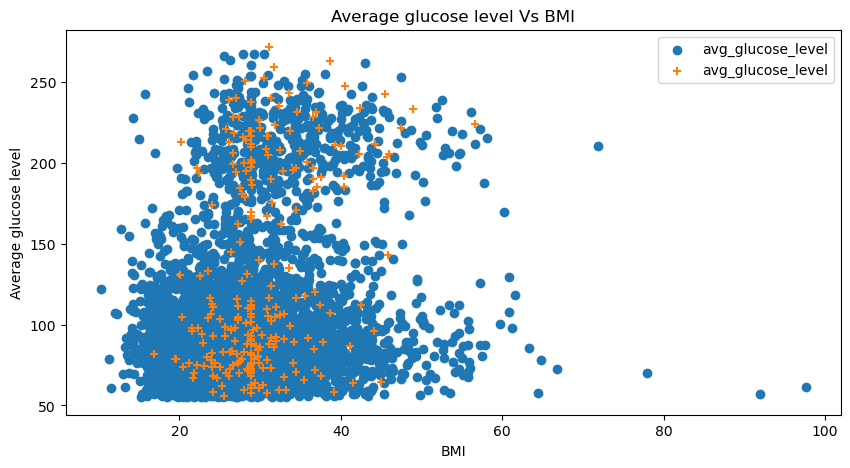

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(x='bmi',y='avg_glucose_level', data=df[df['stroke']==0])
plt.scatter(x='bmi',y='avg_glucose_level', data=df[df['stroke']==1], marker='+')

plt.xlabel('BMI')
plt.ylabel('Average glucose level')
plt.title('Average glucose level Vs BMI')
plt.legend()
plt.show()

Based on the plot, it can be suggested that individuals with a BMI within the range of 20 to 50 have the maximum possibility of experiencing a stroke. Other factors such as age are not considered in this conclusion.

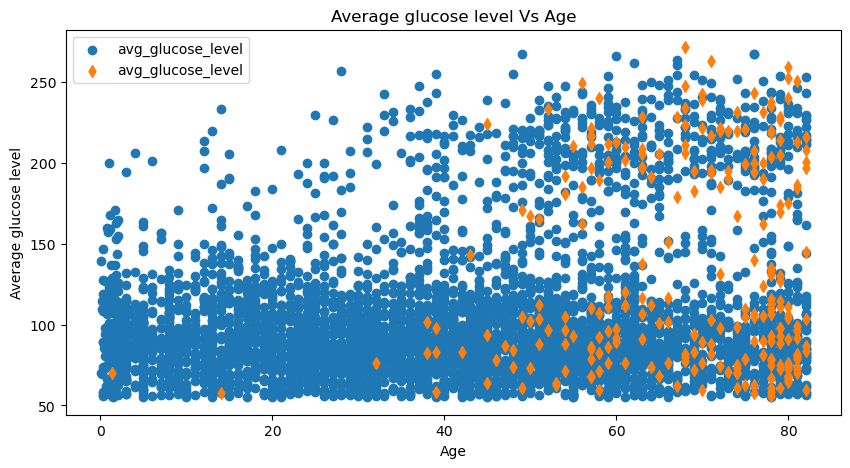

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(x='age',y='avg_glucose_level', data=df[df['stroke']==0])
plt.scatter(x='age',y='avg_glucose_level', data=df[df['stroke']==1], marker='d')

plt.xlabel('Age')
plt.ylabel('Average glucose level')
plt.title('Average glucose level Vs Age')
plt.legend()
plt.show()

Based on the plot, it can be concluded that individuals with an age within the range of 40 to 80 have the maximum possibility of experiencing a stroke.

C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


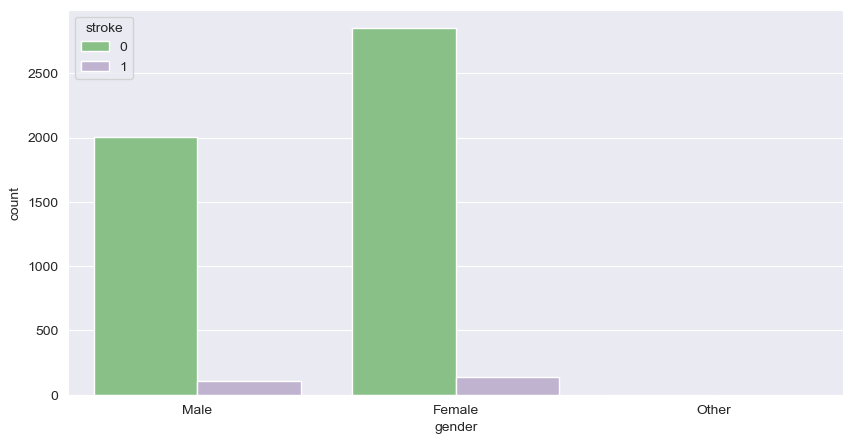

In [29]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['gender'], hue=df['stroke'],palette="Accent")
plt.show()

C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


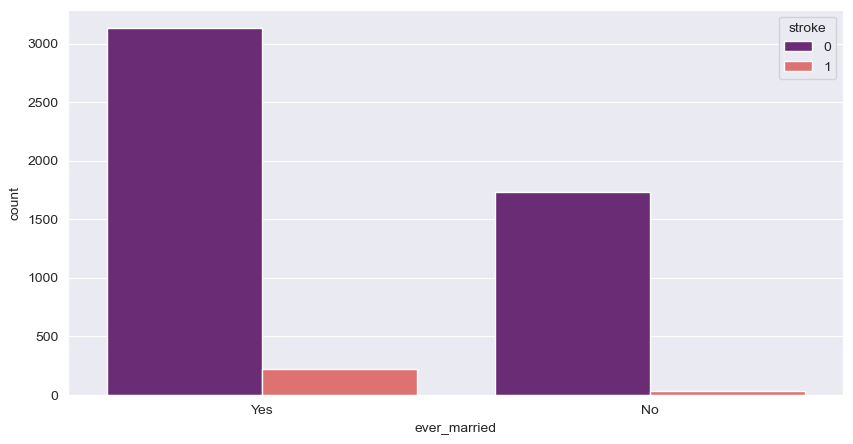

In [31]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['ever_married'], hue=df['stroke'],palette="magma")
plt.show()



C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


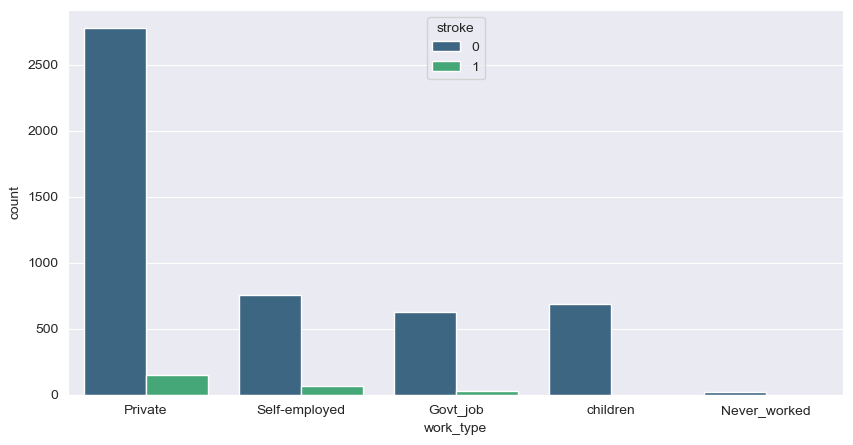

In [32]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['work_type'], hue=df['stroke'],palette="viridis")
plt.show()



C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


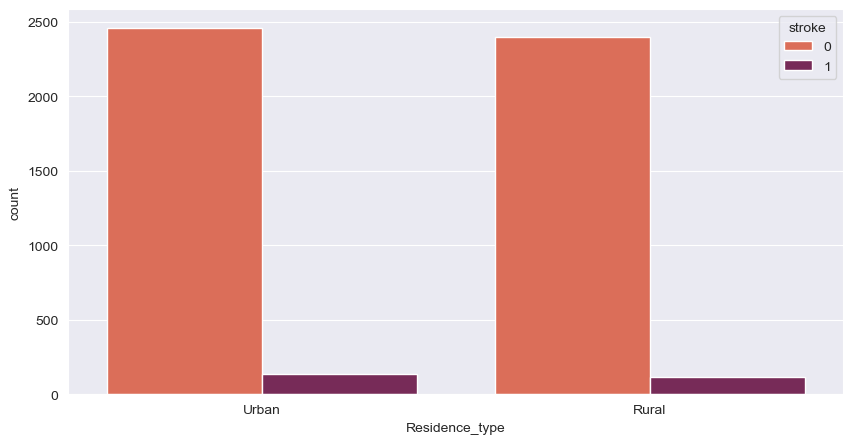

In [33]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['Residence_type'], hue=df['stroke'],palette="rocket_r")
plt.show()



C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


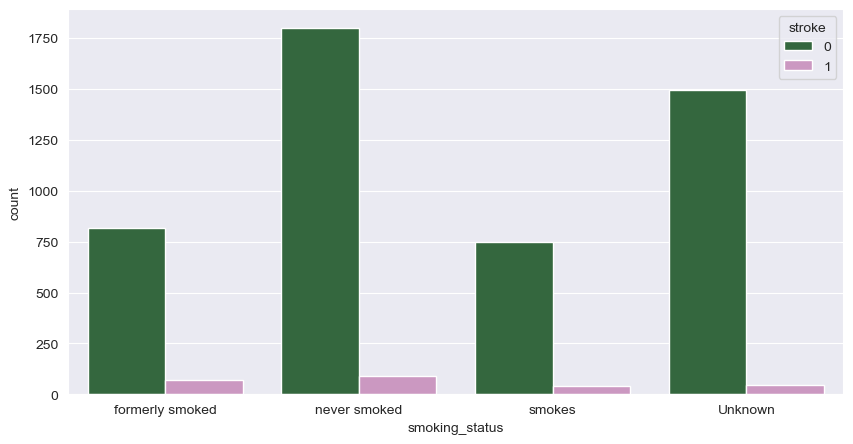

In [34]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['smoking_status'], hue=df['stroke'],palette="cubehelix")
plt.show()

In [36]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q3)
print(Q1)

8.999999999999996
32.8
23.8


In [41]:
#removing all the outlier from the dataframe
df_numeric_remove_outlier = df['bmi'][~((df['bmi'] < (Q1 - 1.5 * IQR)) |(df['bmi'] > (Q3 + 1.5 * IQR)))]
df_numeric_remove_outlier.shape

(4984,)

In [42]:
df_numeric_remove_outlier[:5]
df_new=pd.DataFrame(data=df_numeric_remove_outlier)

In [43]:
df_new.head()

,bmi
0,36.600000
1,28.893237
2,32.500000
3,34.400000
4,24.000000


C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

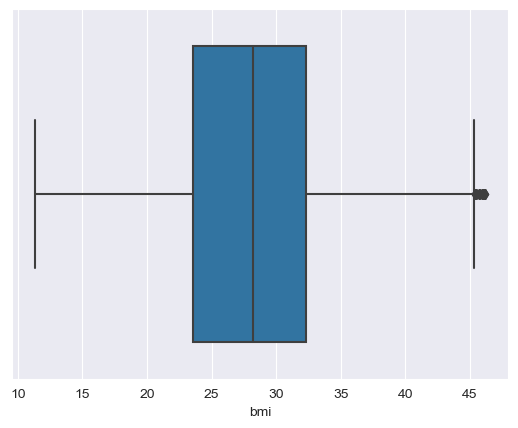

In [44]:
sns.boxplot(df_new['bmi'])

In [45]:
col=df[['gender','ever_married','work_type','Residence_type','smoking_status']]

df = df[~df['gender'].isin(['Other'])]

In [46]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [47]:
encoder=LabelEncoder()
df['gender']=encoder.fit_transform(df['gender'])
df['ever_married']=encoder.fit_transform(df['ever_married'])
df['work_type']=encoder.fit_transform(df['work_type'])
df['Residence_type']=encoder.fit_transform(df['Residence_type'])
df['smoking_status']=encoder.fit_transform(df['smoking_status'])

In [48]:
col=df[['gender','ever_married','work_type','Residence_type','smoking_status']]
for i in col:
    print(f'{i}: unique elements | {col[i].unique()}')

gender: unique elements | [1 0]
ever_married: unique elements | [1 0]
work_type: unique elements | [2 3 0 4 1]
Residence_type: unique elements | [1 0]
smoking_status: unique elements | [1 2 3 0]


In [49]:
df1=pd.concat([col,df_new,df['stroke'],df['age'],df['hypertension'],df['heart_disease'],
              df['avg_glucose_level']],axis=1, join='inner')

In [50]:
df1.head()

,gender,ever_married,work_type,Residence_type,smoking_status,bmi,stroke,age,hypertension,heart_disease,avg_glucose_level
0,1,1,2,1,1,36.600000,1,67.0,0,1,228.69
1,0,1,3,0,2,28.893237,1,61.0,0,0,202.21
2,1,1,2,0,2,32.500000,1,80.0,0,1,105.92
3,0,1,2,1,3,34.400000,1,49.0,0,0,171.23
4,0,1,3,0,2,24.000000,1,79.0,1,0,174.12


In [52]:

Features_variable=df1.drop(['stroke'], axis='columns')
Target_variable=df1['stroke']

In [54]:
Features_variable.head()

,gender,ever_married,work_type,Residence_type,smoking_status,bmi,age,hypertension,heart_disease,avg_glucose_level
0,1,1,2,1,1,36.600000,67.0,0,1,228.69
1,0,1,3,0,2,28.893237,61.0,0,0,202.21
2,1,1,2,0,2,32.500000,80.0,0,1,105.92
3,0,1,2,1,3,34.400000,49.0,0,0,171.23
4,0,1,3,0,2,24.000000,79.0,1,0,174.12


In [56]:
#Normalize data
scaler=Normalizer()
Features_variable_scaled=scaler.fit_transform(Features_variable)

In [60]:
#split the data
X_train, X_test, Target_variable_train, Target_variable_test = train_test_split(Features_variable_scaled,Target_variable,test_size=0.50)

Before Over Sampling 2491


C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


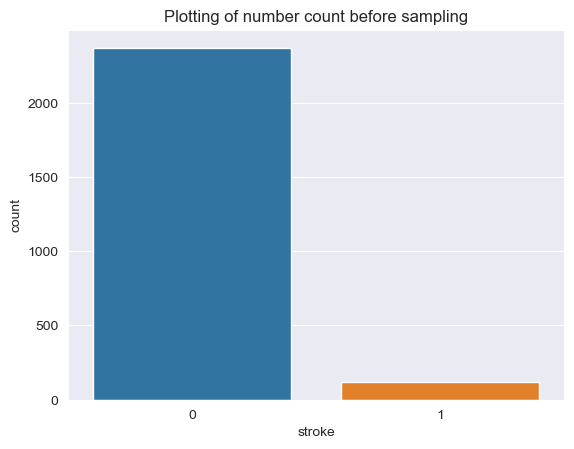

In [61]:
counter=len(Target_variable_train)
print('Before Over Sampling', counter)
sns.countplot(Target_variable_train)
plt.title('Plotting of number count before sampling')
plt.show()

After Over Sampling 4742


C:\Users\lawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


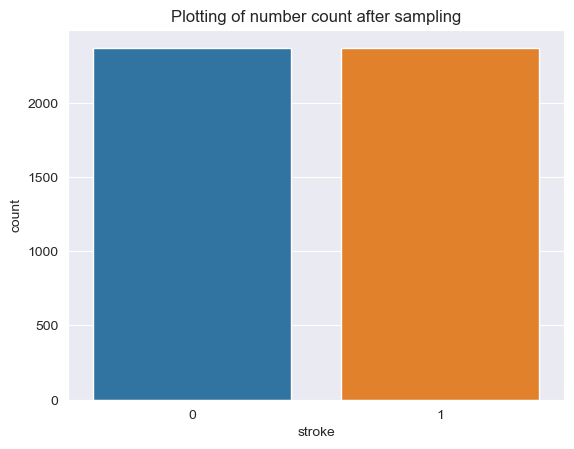

In [62]:
#oversampling the train datsets using SMOTE
sm=SMOTE()
X_train_sm, Target_variable_train_sm=sm.fit_resample(X_train,Target_variable_train)
counter=len(Target_variable_train_sm)
print('After Over Sampling', counter)
plt.title('Plotting of number count after sampling')
sns.countplot(Target_variable_train_sm)
plt.show()

Building the model

In [65]:
model_RF=RandomForestClassifier(n_estimators=40)
model_RF.fit(X_train_sm,Target_variable_train_sm)

RandomForestClassifier(n_estimators=40)

In [73]:
model_RF.score(X_test,Target_variable_test)*100

92.61637239165329

In [74]:
pred_RF=model_RF.predict(X_test)
pred_RF[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [75]:
print(f"Accuracy Score : {round(accuracy_score(Target_variable_test, pred_RF) * 100, 2)}%")

Accuracy Score : 92.62%


In [76]:
print(classification_report(Target_variable_test, pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2366
           1       0.20      0.15      0.17       126

    accuracy                           0.93      2492
   macro avg       0.58      0.56      0.57      2492
weighted avg       0.92      0.93      0.92      2492



In [78]:
cm=confusion_matrix(Target_variable_test,pred_RF)
cm

array([[2289,   77],
       [ 107,   19]], dtype=int64)

In [83]:
model_params = {'random_forest': {'model': RandomForestClassifier(),'params' : {
            'n_estimators': [1,5,10,15,20,25,30]}},
            'logistic_regression' : {'model': LogisticRegression(solver='liblinear'),'params': {
            'C': [1,5,10,15,20,25] }},
            'decision_tree': {'model': DecisionTreeClassifier(),'params':{
            'criterion':['gini','entropy']}}}

In [84]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,random_forest,0.945805,{'n_estimators': 20}
1,logistic_regression,0.945805,{'C': 1}
2,decision_tree,0.895219,{'criterion': 'entropy'}


After testing different models on the dataset, we found that both Random Forest and Logistic Regression performed well with an accuracy score of 0.95 each. This means they are good at predicting stroke based on the dataset we examined. So, these two models are the best choices for predicting stroke using this dataset.